# Initial data analysis

**Date:** 4/5/2020  
**Author:** Charles Farr

The script below does the following:
1. Imports raw data generated by the data_preparation_v2.ipynb
1. Runs an analysis on 20 subsets of the data - 1 per CBSA
1. Outputs analysis results for each subset to readable formats for review by remainder of team

# Import packages / set global variables

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import statsmodels.api as sm
from sklearn import linear_model

# %matplotlib inline

In [3]:
# setting directories for data i/o

data_directory = 'C:/Users/charl/Documents/CNT 2020/Evictions/cnt-evictions/data/'
# hta_directory = 'hta_blocks/'
# eviction_lab_directory = 'ev_lab_blocks/'

analysis_data_file_name = 'joined_analysis_df_20200405_0000.csv'

In [4]:
# updating pandas view settings

pd.set_option('display.max_columns', 999)


# Import cleaned data analysis dataset

In [5]:
analysis_df = pd.read_csv(data_directory+analysis_data_file_name, low_memory=False)

In [6]:
analysis_df.head()

,Unnamed: 0,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,0,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,603.0,161.0,161.70,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.63,8.60,1.67,2.0,2.0,20079.0,17748.0,19925.0,3.0,4.0,3.0,12338.0,11151.0,12322.0,9106.0,8292.0,9115.0,3220.0,2846.0,3195.0,12.0,13.0,12.0,13.0,14.0,13.0,7.5,5.3,2.20,1.00,25032.0,55.0,14458.0,88.0,10.0,109.0,828,860.0,1039.0,742.0,40.0,60.0,az,4.013061e+10,2016,609.04.1,"Maricopa County, Arizona",603.0,19.27,123.0,60.25,742.0,33625.0,57300.0,18.1,34.83,0.83,60.36,0.00,0.00,0.00,0.00,3.98,NaN,NaN,NaN,NaN,0,0,0
1,1,4.013110e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2283.0,550.0,208.83,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.01,21.10,1.72,2.0,2.0,18699.0,16734.0,18581.0,6.0,7.0,6.0,12399.0,10982.0,12316.0,9379.0,8276.0,9315.0,2999.0,2683.0,2980.0,22.0,23.0,22.0,24.0,26.0,24.0,7.0,5.0,9.84,2.63,34717.0,70.0,36272.0,92.0,8.0,187.0,727,861.0,918.0,799.0,52.0,48.0,az,4.013110e+10,2016,1099.3,"Maricopa County, Arizona",2283.0,43.28,271.0,48.18,799.0,21959.0,55500.0,33.8,5.48,8.54,85.98,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
2,2,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,824.0,220.0,117.03,52.0,62.0,52.0,27.0,33.0,27.0,25.0,29.0,25.0,11.31,21.25,1.86,2.0,2.0,22311.0,19998.0,22158.0,2.0,2.0,2.0,13682.0,12387.0,13645.0,10098.0,9174.0,10086.0,3578.0,3207.0,3553.0,6.0,6.0,6.0,7.0,7.0,7.0,5.7,2.2,3.44,1.88,18034.0,88.0,8027.0,87.0,9.0,283.0,1114,1191.0,1432.0,880.0,56.0,44.0,az,4.013061e+10,2016,610.32.4,"Maricopa County, Arizona",824.0,0.00,81.0,43.64,880.0,81250.0,157900.0,16.7,54.73,5.58,29.25,4.73,0.00,0.00,5.70,0.00,NaN,NaN,NaN,NaN,0,0,0
3,3,4.013217e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,201.0,130.0,72.82,58.0,68.0,57.0,34.0,42.0,34.0,24.0,26.0,24.0,5.01,8.94,1.76,2.0,2.0,20321.0,17604.0,20073.0,3.0,3.0,3.0,12837.0,11259.0,12708.0,9567.0,8425.0,9477.0,3259.0,2823.0,3219.0,12.0,11.0,12.0,13.0,12.0,13.0,5.9,7.1,28.33,1.79,24598.0,54.0,39081.0,91.0,5.0,220.0,707,1514.0,1514.0,NaN,88.0,12.0,az,4.013217e+10,2016,2169.01.3,"Maricopa County, Arizona",201.0,12.50,55.0,11.54,NaN,68194.0,283000.0,NaN,95.52,0.00,4.48,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
4,4,4.021001e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2653.0,827.0,30248.83,55.0,65.0,54.0,26.0,32.0,26.0,29.0,33.0,29.0,10.62,0.29,2.10,2.0,2.0,25504.0,22972.0,25294.0,0.0,0.0,0.0,15530.0,14294.0,15487.0,11440.0,10610.0,11431.0,4090.0,3684.0,4056.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.2,0.79,0.03,1793.0,74.0,1740.0,83.0,121.0,16.0,2336,1149.0,1293.0,907.0,63.0,37.0,az,4.021001e+10,2016,12.1,"Pinal County, Arizona",2653.0,8.09,226.0,37.24,907.0,54922.0,126300.0,31.9,47.57,0.94,39.39,6.71,1.06,0.57,3.77,0.00,NaN,NaN,NaN,NaN,0,0,0


In [7]:
analysis_df.columns

Index(['Unnamed: 0', 'blkgrp', 'cbsa', 'blkgrps', 'population_x', 'households',
       'land_acres', 'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami',
       'h_nmi', 't_ami', 't_80ami', 't_nmi', 'co2_per_hh_local',
       'co2_per_acre_local', 'autos_per_hh_ami', 'autos_per_hh_80ami',
       'autos_per_hh_nmi', 'vmt_per_hh_ami', 'vmt_per_hh_80ami',
       'vmt_per_hh_nmi', 'pct_transit_commuters_ami',
       'pct_transit_commuters_80ami', 'pct_transit_commuters_nmi',
       't_cost_ami', 't_cost_80ami', 't_cost_nmi', 'auto_ownership_cost_ami',
       'auto_ownership_cost_80ami', 'auto_ownership_cost_nmi', 'vmt_cost_ami',
       'vmt_cost_80ami', 'vmt_cost_nmi', 'transit_cost_ami',
       'transit_cost_80ami', 'transit_cost_nmi', 'transit_trips_ami',
       'transit_trips_80ami', 'transit_trips_nmi', 'compact_ndx',
       'emp_ovrll_ndx', 'res_density', 'gross_hh_density', 'hh_gravity',
       'frac_sfd', 'emp_gravity', 'emp_ndx', 'block_size',
       'intersection_density', 'avg_blo

In [8]:
analysis_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
analysis_df.head()

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,603.0,161.0,161.70,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.63,8.60,1.67,2.0,2.0,20079.0,17748.0,19925.0,3.0,4.0,3.0,12338.0,11151.0,12322.0,9106.0,8292.0,9115.0,3220.0,2846.0,3195.0,12.0,13.0,12.0,13.0,14.0,13.0,7.5,5.3,2.20,1.00,25032.0,55.0,14458.0,88.0,10.0,109.0,828,860.0,1039.0,742.0,40.0,60.0,az,4.013061e+10,2016,609.04.1,"Maricopa County, Arizona",603.0,19.27,123.0,60.25,742.0,33625.0,57300.0,18.1,34.83,0.83,60.36,0.00,0.00,0.00,0.00,3.98,NaN,NaN,NaN,NaN,0,0,0
1,4.013110e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2283.0,550.0,208.83,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.01,21.10,1.72,2.0,2.0,18699.0,16734.0,18581.0,6.0,7.0,6.0,12399.0,10982.0,12316.0,9379.0,8276.0,9315.0,2999.0,2683.0,2980.0,22.0,23.0,22.0,24.0,26.0,24.0,7.0,5.0,9.84,2.63,34717.0,70.0,36272.0,92.0,8.0,187.0,727,861.0,918.0,799.0,52.0,48.0,az,4.013110e+10,2016,1099.3,"Maricopa County, Arizona",2283.0,43.28,271.0,48.18,799.0,21959.0,55500.0,33.8,5.48,8.54,85.98,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
2,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,824.0,220.0,117.03,52.0,62.0,52.0,27.0,33.0,27.0,25.0,29.0,25.0,11.31,21.25,1.86,2.0,2.0,22311.0,19998.0,22158.0,2.0,2.0,2.0,13682.0,12387.0,13645.0,10098.0,9174.0,10086.0,3578.0,3207.0,3553.0,6.0,6.0,6.0,7.0,7.0,7.0,5.7,2.2,3.44,1.88,18034.0,88.0,8027.0,87.0,9.0,283.0,1114,1191.0,1432.0,880.0,56.0,44.0,az,4.013061e+10,2016,610.32.4,"Maricopa County, Arizona",824.0,0.00,81.0,43.64,880.0,81250.0,157900.0,16.7,54.73,5.58,29.25,4.73,0.00,0.00,5.70,0.00,NaN,NaN,NaN,NaN,0,0,0
3,4.013217e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,201.0,130.0,72.82,58.0,68.0,57.0,34.0,42.0,34.0,24.0,26.0,24.0,5.01,8.94,1.76,2.0,2.0,20321.0,17604.0,20073.0,3.0,3.0,3.0,12837.0,11259.0,12708.0,9567.0,8425.0,9477.0,3259.0,2823.0,3219.0,12.0,11.0,12.0,13.0,12.0,13.0,5.9,7.1,28.33,1.79,24598.0,54.0,39081.0,91.0,5.0,220.0,707,1514.0,1514.0,NaN,88.0,12.0,az,4.013217e+10,2016,2169.01.3,"Maricopa County, Arizona",201.0,12.50,55.0,11.54,NaN,68194.0,283000.0,NaN,95.52,0.00,4.48,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
4,4.021001e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2653.0,827.0,30248.83,55.0,65.0,54.0,26.0,32.0,26.0,29.0,33.0,29.0,10.62,0.29,2.10,2.0,2.0,25504.0,22972.0,25294.0,0.0,0.0,0.0,15530.0,14294.0,15487.0,11440.0,10610.0,11431.0,4090.0,3684.0,4056.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.2,0.79,0.03,1793.0,74.0,1740.0,83.0,121.0,16.0,2336,1149.0,1293.0,907.0,63.0,37.0,az,4.021001e+10,2016,12.1,"Pinal County, Arizona",2653.0,8.09,226.0,37.24,907.0,54922.0,126300.0,31.9,47.57,0.94,39.39,6.71,1.06,0.57,3.77,0.00,NaN,NaN,NaN,NaN,0,0,0


In [10]:
test_columns = ['blkgrp', 'cbsa', 'state', 'GEOID', 'year', 'name', 'parent-location', 'evictions', 'eviction-rate', 'eviction-filing-rate']

In [11]:
analysis_df[test_columns].count()

blkgrp                  77993
cbsa                    77993
state                   77993
GEOID                   77993
year                    77993
name                    77993
parent-location         77993
evictions               65005
eviction-rate           65005
eviction-filing-rate    65005
dtype: int64

In [12]:
analysis_df[test_columns].nunique()

blkgrp                  77993
cbsa                       20
state                      22
GEOID                   77993
year                        1
name                    52441
parent-location           198
evictions                 153
eviction-rate            1713
eviction-filing-rate     4133
dtype: int64

In [13]:
analysis_df.groupby(['cbsa','state'])['blkgrp'].count()

cbsa                                          state
Atlanta-Sandy Springs-Roswell, GA             ga       2597
Baltimore-Columbia-Towson, MD                 md       1945
Boston-Cambridge-Newton, MA-NH                ma       3156
                                              nh        258
Chicago-Naperville-Elgin, IL-IN-WI            il       5974
                                              in        484
                                              wi        127
Dallas-Fort Worth-Arlington, TX               tx       4163
Detroit-Warren-Dearborn, MI                   mi       3694
Houston-The Woodlands-Sugar Land, TX          tx       3018
Los Angeles-Long Beach-Anaheim, CA            ca       8243
Miami-Fort Lauderdale-West Palm Beach, FL     fl       3416
Minneapolis-St. Paul-Bloomington, MN-WI       mn       2298
                                              wi         72
New York-Newark-Jersey City, NY-NJ-PA         nj       4711
                                              ny

# Build & test analysis script for 1 subset

In [14]:
analysis_df.columns

Index(['blkgrp', 'cbsa', 'blkgrps', 'population_x', 'households', 'land_acres',
       'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami', 'h_nmi', 't_ami',
       't_80ami', 't_nmi', 'co2_per_hh_local', 'co2_per_acre_local',
       'autos_per_hh_ami', 'autos_per_hh_80ami', 'autos_per_hh_nmi',
       'vmt_per_hh_ami', 'vmt_per_hh_80ami', 'vmt_per_hh_nmi',
       'pct_transit_commuters_ami', 'pct_transit_commuters_80ami',
       'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi',
       'auto_ownership_cost_ami', 'auto_ownership_cost_80ami',
       'auto_ownership_cost_nmi', 'vmt_cost_ami', 'vmt_cost_80ami',
       'vmt_cost_nmi', 'transit_cost_ami', 'transit_cost_80ami',
       'transit_cost_nmi', 'transit_trips_ami', 'transit_trips_80ami',
       'transit_trips_nmi', 'compact_ndx', 'emp_ovrll_ndx', 'res_density',
       'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx',
       'block_size', 'intersection_density', 'avg_block_perimeter_meters',

Working off of the following links:
- https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

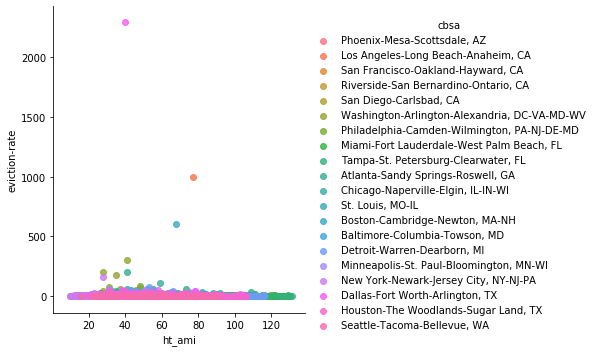

In [15]:
# Review the data to identify outliers

sns.lmplot("ht_ami", "eviction-rate", data=analysis_df, hue="cbsa", fit_reg=False)

In [16]:
# Check where eviction rate count is > 100

analysis_df[test_columns].loc[analysis_df['eviction-rate']>100].count()

blkgrp                  23
cbsa                    23
state                   23
GEOID                   23
year                    23
name                    23
parent-location         23
evictions               23
eviction-rate           23
eviction-filing-rate    23
dtype: int64

In [17]:
# investigate data of blockgroups without NaN values for eviction-rate

analysis_df[test_columns].loc[analysis_df['evictions'].isna() != True].head(10)

,blkgrp,cbsa,state,GEOID,year,name,parent-location,evictions,eviction-rate,eviction-filing-rate
2704,6.037119e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037119e+10,2016,1190.02.5,"Los Angeles County, California",2.0,1.61,1.61
2705,6.037320e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037320e+10,2016,3200.1,"Los Angeles County, California",0.0,0.00,0.00
2706,6.037124e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037124e+10,2016,1240.1,"Los Angeles County, California",2.0,1.02,1.02
2707,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037135e+10,2016,1347.10.2,"Los Angeles County, California",1.0,0.22,0.22
2708,6.037137e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037137e+10,2016,1372.01.3,"Los Angeles County, California",0.0,0.00,0.00
2709,6.037911e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037911e+10,2016,9107.09.1,"Los Angeles County, California",0.0,0.00,0.00
2710,6.037543e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037543e+10,2016,5425.01.1,"Los Angeles County, California",7.0,2.05,2.05
2711,6.037543e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037543e+10,2016,5432.01.2,"Los Angeles County, California",7.0,3.21,3.21
2712,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037135e+10,2016,1351.11.1,"Los Angeles County, California",0.0,0.00,0.00
2713,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037135e+10,2016,1351.11.3,"Los Angeles County, California",0.0,0.00,0.00


In [18]:
# build dataset restricting data to eviction-rate < 100

analysis_filtered_df = analysis_df.loc[(analysis_df['eviction-rate']<=100) & (analysis_df['population_x']>0)].copy()

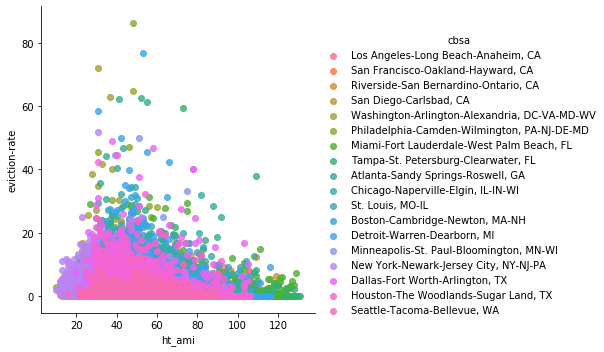

In [19]:
# Review the data to identify outliers

sns.lmplot("ht_ami", "eviction-rate", data=analysis_filtered_df, hue="cbsa", fit_reg=False)

In [20]:
# count of NaNs in filtered dataset

analysis_filtered_df['ht_ami'].loc[analysis_filtered_df['ht_ami'].isnull()].count()

0

In [21]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(analysis_filtered_df, columns=['ht_ami'])

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(analysis_filtered_df, columns=['eviction-rate'])

In [22]:
X = analysis_filtered_df['ht_ami'].values.reshape(-1, 1)
Y = analysis_filtered_df['eviction-rate'].values.reshape(-1, 1)

In [23]:
np.where(np.isnan(X))

(array([   15,    34,    43,    51,    55,    86,    91,    94,   102,
          145,   195,   216,   235,   240,   253,   313,   319,   506,
          641,   647,   673,   836,   915,   958,   959,   968,   981,
         1005,  1069,  1084,  1105,  1231,  1273,  1292,  1306,  1340,
         1378,  1395,  1424,  1443,  1472,  1480,  1498,  1506,  1510,
         1513,  1515,  1526,  1591,  1660,  1708,  1731,  1753,  1771,
         1775,  1776,  1780,  1839,  1885,  1892,  1915,  1946,  2064,
         2275,  2301,  2376,  2512,  2545,  2561,  2562,  2664,  2687,
         2785,  2880,  3010,  3155,  3167,  3211,  3252,  3301,  3335,
         3426,  3528,  3574,  3631,  3650,  3723,  3823,  3852,  3873,
         3918,  3981,  4153,  4157,  4230,  4341,  4375,  4380,  4385,
         4426,  4476,  4482,  4527,  4561,  4580,  4676,  4749,  4757,
         4763,  4795,  4855,  4858,  4885,  4937,  4961,  4975,  4980,
         5071,  5078,  5226,  5321,  5344,  5432,  5460,  5709,  6027,
      

In [24]:
X = np.nan_to_num(X)

In [25]:
np.where(np.isnan(Y))

(array([], dtype=int64), array([], dtype=int64))

In [26]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
Y_pred = lm.predict(X)  # make predictions

In [27]:
print(Y_pred)

[[1.62750567]
 [0.74480689]
 [1.80404542]
 ...
 [2.58082034]
 [2.26304878]
 [2.43958854]]


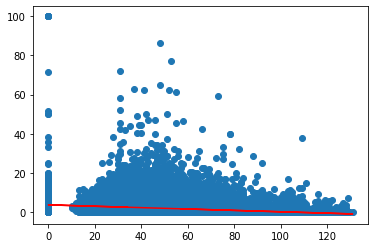

In [28]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [29]:
# X = df["RM"] ## X usually means our input variables (or independent variables)
# y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2121.
Date:                Sun, 05 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:50:32   Log-Likelihood:            -1.6837e+05
No. Observations:               64809   AIC:                         3.367e+05
Df Residuals:                   64807   BIC:                         3.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6401      0.041     88.528      0.000       3.559       3.721
x1            -0.0353      0.001    -46.058      0.000      -0.037      -0.034
==============================================================================
Omnibus:                    84020.314   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40882013.606
Skew:                           6.906   Prob(JB):                         0.00
Kurtosis:                     125.265   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression

## Create list of CBSAs

In [30]:
cbsa_list = analysis_filtered_df['cbsa'].unique().tolist()

In [31]:
cbsa_list

['Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco-Oakland-Hayward, CA',
 'Riverside-San Bernardino-Ontario, CA',
 'San Diego-Carlsbad, CA',
 'Washington-Arlington-Alexandria, DC-VA-MD-WV',
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
 'Miami-Fort Lauderdale-West Palm Beach, FL',
 'Tampa-St. Petersburg-Clearwater, FL',
 'Atlanta-Sandy Springs-Roswell, GA',
 'Chicago-Naperville-Elgin, IL-IN-WI',
 'St. Louis, MO-IL',
 'Boston-Cambridge-Newton, MA-NH',
 'Detroit-Warren-Dearborn, MI',
 'Minneapolis-St. Paul-Bloomington, MN-WI',
 'New York-Newark-Jersey City, NY-NJ-PA',
 'Dallas-Fort Worth-Arlington, TX',
 'Houston-The Woodlands-Sugar Land, TX',
 'Seattle-Tacoma-Bellevue, WA']

## Run Linear Regression on ht_ami & eviction-rate

In [32]:
# iterate through cbsa_lists and generate models

predictions = {}

# iterate through each CBSA and output the results
for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    # create DataFrame for analysis within for loop (limited to one cbsa)
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
    # select variables
    X = iterated_df['ht_ami'].values.reshape(-1, 1)
    Y = iterated_df['eviction-rate'].values.reshape(-1, 1)
    
   # final data clean
    X = np.nan_to_num(X) # fill in NULL / NA / NaN values 

    # add intercept to model
    X = sm.add_constant(X)

    # create model & prediction
    cbsa_model = sm.OLS(Y, X).fit() # sm.OLS(output, input)
    cbsa_predictions = model.predict(X)
    
    # create plot
#     cbsa_plot = sns.lmplot('ht_ami', 'eviction-rate', data=iterated_df, hue="cbsa", fit_reg=False)

    # store model & preduction
    predictions[cbsa] = [cbsa_model,cbsa_predictions]
    
    # Print out the statistics and plot
    print(cbsa_model.summary())
    print('### pvalues:')
    print(cbsa_model.pvalues)
#     print(cbsa_plot)
    print('##############################################')

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1107
Date:                Sun, 05 Apr 2020   Prob (F-statistic):              0.739
Time:                        20:50:32   Log-Likelihood:                -12757.
No. Observations:                8213   AIC:                         2.552e+04
Df Residuals:                    8211   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

# Run analysis on h_ami, t_ami, and eviction rate

In [33]:
analysis_filtered_df.columns

Index(['blkgrp', 'cbsa', 'blkgrps', 'population_x', 'households', 'land_acres',
       'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami', 'h_nmi', 't_ami',
       't_80ami', 't_nmi', 'co2_per_hh_local', 'co2_per_acre_local',
       'autos_per_hh_ami', 'autos_per_hh_80ami', 'autos_per_hh_nmi',
       'vmt_per_hh_ami', 'vmt_per_hh_80ami', 'vmt_per_hh_nmi',
       'pct_transit_commuters_ami', 'pct_transit_commuters_80ami',
       'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi',
       'auto_ownership_cost_ami', 'auto_ownership_cost_80ami',
       'auto_ownership_cost_nmi', 'vmt_cost_ami', 'vmt_cost_80ami',
       'vmt_cost_nmi', 'transit_cost_ami', 'transit_cost_80ami',
       'transit_cost_nmi', 'transit_trips_ami', 'transit_trips_80ami',
       'transit_trips_nmi', 'compact_ndx', 'emp_ovrll_ndx', 'res_density',
       'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx',
       'block_size', 'intersection_density', 'avg_block_perimeter_meters',

In [34]:
# iterate through cbsa_lists and generate models

multi_predictions = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
#     # define the data/predictors as the pre-set feature names  
#     df = pd.DataFrame(iterated_df, columns=['ht_ami'])

#     # Put the target (eviction-rate) in another DataFrame
#     target = pd.DataFrame(iterated_df, columns=['eviction-rate'])
    
    X = iterated_df[['h_ami','t_ami']] #.values.reshape(-1, 1)
    Y = iterated_df['eviction-rate'] #.values.reshape(-1, 1)
    
    X = np.nan_to_num(X)

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    cbsa_model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
#     cbsa_predictions = model.predict(X)
    
#     cbsa_plot = sns.lmplot('ht_ami', 'eviction-rate', data=iterated_df, hue="cbsa", fit_reg=False) 

    multi_predictions[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())
    print('### pvalues:')
    print(cbsa_model.pvalues)
    print('##############################################')
    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction-rate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     35.54
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.28e-16
Time:                        20:50:33   Log-Likelihood:                -12722.
No. Observations:                8213   AIC:                         2.545e+04
Df Residuals:                    8210   BIC:                         2.547e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

# Run analysis on t_ami, rent_burden, & eviction rate

**_No rent_burden variable exists_** 

In [52]:
# iterate through cbsa_lists and generate models

multi_predictions = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
#     # define the data/predictors as the pre-set feature names  
#     df = pd.DataFrame(iterated_df, columns=['ht_ami'])

#     # Put the target (eviction-rate) in another DataFrame
#     target = pd.DataFrame(iterated_df, columns=['eviction-rate'])
    
    X = iterated_df[['rent_burden','t_ami']] #.values.reshape(-1, 1)
    Y = iterated_df['eviction-rate'] #.values.reshape(-1, 1)
    
    X = np.nan_to_num(X)

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    cbsa_model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)
#     cbsa_predictions = model.predict(X)
    
#     cbsa_plot = sns.lmplot('ht_ami', 'eviction-rate', data=iterated_df, hue="cbsa", fit_reg=False) 

    multi_predictions[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())
#     print(cbsa_plot)
    

cbsa: Los Angeles-Long Beach-Anaheim, CA


KeyError: "['rent_burden'] not in index"

# Testing a multivariate regression

In [36]:
columns = analysis_filtered_df.columns

In [37]:
updated_columns = []

for name in columns:
    new_name = name.replace('-', '_')
    updated_columns.append(new_name)

In [38]:
updated_columns

['blkgrp',
 'cbsa',
 'blkgrps',
 'population_x',
 'households',
 'land_acres',
 'ht_ami',
 'ht_80ami',
 'ht_nmi',
 'h_ami',
 'h_80ami',
 'h_nmi',
 't_ami',
 't_80ami',
 't_nmi',
 'co2_per_hh_local',
 'co2_per_acre_local',
 'autos_per_hh_ami',
 'autos_per_hh_80ami',
 'autos_per_hh_nmi',
 'vmt_per_hh_ami',
 'vmt_per_hh_80ami',
 'vmt_per_hh_nmi',
 'pct_transit_commuters_ami',
 'pct_transit_commuters_80ami',
 'pct_transit_commuters_nmi',
 't_cost_ami',
 't_cost_80ami',
 't_cost_nmi',
 'auto_ownership_cost_ami',
 'auto_ownership_cost_80ami',
 'auto_ownership_cost_nmi',
 'vmt_cost_ami',
 'vmt_cost_80ami',
 'vmt_cost_nmi',
 'transit_cost_ami',
 'transit_cost_80ami',
 'transit_cost_nmi',
 'transit_trips_ami',
 'transit_trips_80ami',
 'transit_trips_nmi',
 'compact_ndx',
 'emp_ovrll_ndx',
 'res_density',
 'gross_hh_density',
 'hh_gravity',
 'frac_sfd',
 'emp_gravity',
 'emp_ndx',
 'block_size',
 'intersection_density',
 'avg_block_perimeter_meters',
 'h_cost',
 'median_smoc',
 'median_gross_ren

In [39]:
analysis_filtered_df_copy = analysis_filtered_df.copy()

In [40]:
analysis_filtered_df_copy.columns = updated_columns

In [41]:
analysis_filtered_df_copy.dropna(inplace=True)

In [42]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + C(pct_af_am)', data=analysis_filtered_df_copy.loc[analysis_filtered_df_copy['cbsa'] =='Los Angeles-Long Beach-Anaheim, CA']).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.268
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           2.34e-09
Time:                        20:50:43   Log-Likelihood:                -6522.4
No. Observations:                5500   AIC:                         1.650e+04
Df Residuals:                    3772   BIC:                         2.793e+04
Df Model:                        1727                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.34

In [43]:
analysis_filtered_df_copy['pct_af_am'].describe()

count    41778.000000
mean        16.108476
std         25.218850
min          0.000000
25%          0.720000
50%          4.690000
75%         18.107500
max        100.000000
Name: pct_af_am, dtype: float64

In [44]:
analysis_filtered_df_la = analysis_filtered_df_copy.loc[analysis_filtered_df_copy['cbsa'] =='Los Angeles-Long Beach-Anaheim, CA'].copy()

In [45]:
analysis_filtered_df_la['quantile_pct_af_am'] = pd.qcut(analysis_filtered_df_la['pct_af_am'], q=4, duplicates='drop')

In [46]:
pd.qcut(analysis_filtered_df_la['pct_af_am'], q=4, duplicates='drop')

2704     (-0.001, 1.82]
2706      (1.82, 6.762]
2707      (1.82, 6.762]
2708      (1.82, 6.762]
2709     (6.762, 95.73]
              ...      
17750     (1.82, 6.762]
17752    (6.762, 95.73]
17754    (-0.001, 1.82]
17758    (-0.001, 1.82]
17760    (-0.001, 1.82]
Name: pct_af_am, Length: 5500, dtype: category
Categories (3, interval[float64]): [(-0.001, 1.82] < (1.82, 6.762] < (6.762, 95.73]]

In [47]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + quantile_pct_af_am', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     19.74
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           3.79e-16
Time:                        20:50:44   Log-Likelihood:                -7741.8
No. Observations:                5500   AIC:                         1.549e+04
Df Residuals:                    5495   BIC:                         1.553e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [48]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + pct_af_am', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     34.42
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           4.94e-22
Time:                        20:51:40   Log-Likelihood:                -7729.9
No. Observations:                5500   AIC:                         1.547e+04
Df Residuals:                    5496   BIC:                         1.549e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1086      0.106     -1.022      0.3

In [49]:
analysis_filtered_df_la['decile_pct_af_am'] = pd.qcut(analysis_filtered_df_la['pct_af_am'], q=10, duplicates='drop')

In [51]:
analysis_filtered_df_la.head()

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent_location,population_y,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate,low_flag,imputed,subbed,quantile_pct_af_am,decile_pct_af_am
2704,6.037119e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1266.0,344.0,69.97,57.0,67.0,62.0,33.0,42.0,37.0,24.0,25.0,24.0,8.33,40.97,1.86,2.0,2.0,18210.0,16466.0,17133.0,8.0,8.0,8.0,14426.0,12358.0,12972.0,10637.0,8908.0,9394.0,3630.0,3281.0,3414.0,159.0,168.0,164.0,189.0,199.0,194.0,7.3,3.2,5.12,4.92,48116.0,82.0,43925.0,93.0,5.0,239.0,730,1684.0,1677.0,1690.0,49.0,51.0,ca,6.037119e+10,2016,1190.02.5,"Los Angeles County, California",1266.0,18.51,124.0,51.45,1690.0,51719.0,335300.0,50.0,5.61,0.00,93.05,0.0,1.34,0.00,0.00,0.00,2.0,2.0,1.61,1.61,1,0,0,"(-0.001, 1.82]","(-0.001, 0.2]"
2706,6.037124e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1546.0,472.0,65.40,82.0,98.0,90.0,58.0,73.0,65.0,24.0,26.0,24.0,7.42,53.56,1.91,2.0,2.0,17373.0,15354.0,16134.0,8.0,9.0,9.0,14515.0,12435.0,13051.0,10876.0,9193.0,9657.0,3463.0,3060.0,3215.0,175.0,183.0,179.0,207.0,216.0,212.0,7.0,4.4,9.62,7.22,72816.0,79.0,74872.0,95.0,11.0,196.0,970,2940.0,3659.0,1854.0,60.0,40.0,ca,6.037124e+10,2016,1240.1,"Los Angeles County, California",1546.0,0.00,197.0,39.83,1854.0,123462.0,669200.0,24.9,76.71,2.20,7.70,0.0,2.52,0.00,8.86,2.01,2.0,2.0,1.02,1.02,1,0,0,"(1.82, 6.762]","(1.82, 3.07]"
2707,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,2073.0,669.0,99.83,52.0,61.0,56.0,30.0,38.0,34.0,22.0,24.0,23.0,7.60,50.92,1.73,2.0,2.0,17712.0,15634.0,16438.0,8.0,8.0,8.0,13577.0,11573.0,12180.0,9877.0,8286.0,8734.0,3531.0,3115.0,3275.0,169.0,172.0,170.0,200.0,203.0,201.0,8.2,5.5,11.46,6.70,51354.0,45.0,56352.0,93.0,7.0,237.0,848,1521.0,2029.0,1105.0,45.0,55.0,ca,6.037135e+10,2016,1347.10.2,"Los Angeles County, California",2073.0,18.29,452.0,55.01,1105.0,50114.0,333900.0,30.0,27.16,3.86,50.89,0.0,18.09,0.00,0.00,0.00,1.0,1.0,0.22,0.22,1,0,0,"(1.82, 6.762]","(3.07, 5.103]"
2708,6.037137e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1780.0,648.0,182.07,75.0,89.0,82.0,50.0,63.0,57.0,25.0,26.0,25.0,8.13,28.93,1.90,2.0,2.0,20202.0,18061.0,18890.0,3.0,4.0,3.0,14957.0,12792.0,13441.0,10860.0,9119.0,9605.0,4027.0,3599.0,3764.0,70.0,74.0,72.0,82.0,88.0,85.0,5.8,6.6,3.69,3.56,38150.0,88.0,62592.0,93.0,8.0,155.0,791,2547.0,2948.0,1794.0,65.0,35.0,ca,6.037137e+10,2016,1372.01.3,"Los Angeles County, California",1780.0,0.00,103.0,34.72,1794.0,85231.0,631200.0,29.9,69.10,4.72,10.90,0.0,15.22,0.00,0.06,0.00,0.0,0.0,0.00,0.00,1,0,0,"(1.82, 6.762]","(3.07, 5.103]"
2709,6.037911e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1703.0,490.0,3584.99,67.0,79.0,73.0,38.0,47.0,43.0,29.0,32.0,30.0,10.92,1.49,2.21,2.0,2.0,26402.0,23670.0,24740.0,0.0,0.0,0.0,17675.0,15534.0,16151.0,12610.0,10995.0,11407.0,5065.0,4539.0,4744.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.8,0.55,0.14,7094.0,92.0,6264.0,87.0,28.0,42.0,1380,1914.0,1928.0,1858.0,80.0,20.0,ca,6.037911e+10,2016,9107.09.1,"Los Angeles County, Cali

In [50]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + decile_pct_af_am', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.81
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           8.16e-17
Time:                        20:53:09   Log-Likelihood:                -7732.8
No. Observations:                5500   AIC:                         1.549e+04
Df Residuals:                    5490   BIC:                         1.555e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

# Notes

- Need to build a **rent_burden** identifier